### In this Lab we will Learn how to create and run your quantum circuit on the IBM Quantum Systems

To create an account on IBM Experience Website, you need to follow these steps:

1) Go to the quantum computing website: https://quantum-computing.ibm.com/ 2) hit on "Create an IBMid account"

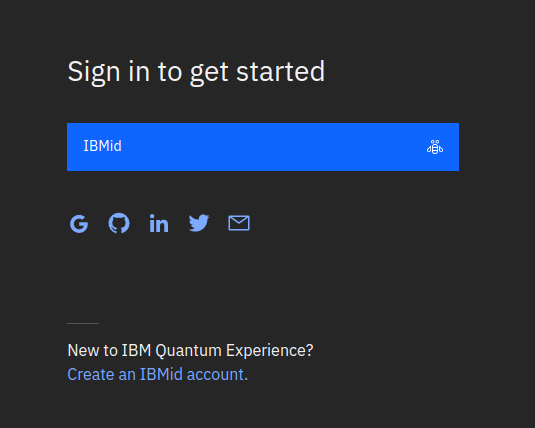

3) fill the required fields and create your own account!

Once you login to your account, you'll be directed to a page where on the left side you have two important options as seen below: (1) Circuit Composer: Allows you to create quantum circuits graphically (2) Quantum Lab: Here you can create a jupyter notebook online

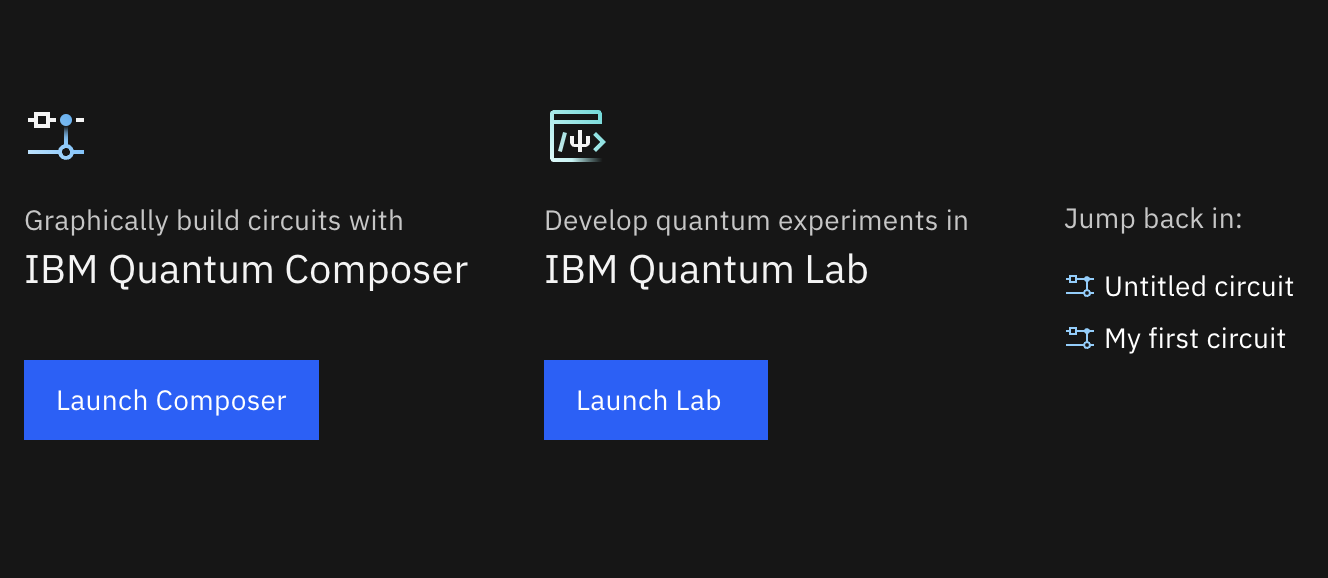

If you use the Quantum Lab, you don't need to install Python/Qiskit on your computer

### First Quantum Circuit With Qiskit - (Necessary Packages)

In [26]:
pip install Qiskit #run this circuit once to install Qiskit

Note: you may need to restart the kernel to use updated packages.


To use visualization functionality or Jupyter notebooks it is recommended to install Qiskit with the extra visualization support:

In [27]:
pip install qiskit[visualization] #run this circuit once to install Qiskit Visualization

zsh:1: no matches found: qiskit[visualization]
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


If you don't have the 'seaborn' library required to use 'plot_state_qsphere'. You can install it with 'pip install seaborn'

### Let's Create a Quantum Circuit

A quantum circuit is composed by quantum and classical bits in Qiskit. To create a single qubit circuit we need one quantum registers for the one qubits and one classical registers for the classical bits in which we store the measurement results of each one of the qubits. To create these registers we type:

In [29]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q =  QuantumRegister(1,"qreg") # the second parameter is optional

c = ClassicalRegister(1,"creg") # the second parameter is optional

# now we can define our quantum circuit
# it is composed by a quantum and a classical registers
qc = QuantumCircuit(q,c)

# we apply NOT operator represented as "x" in qiskit
# operator is a part of the circuit, and we should specify the quantum bit as its parameter
qc.x(q[0]) # (quantum) bits are enumerated starting from 0
# NOT operator or x-gate is applied to the first qubit of the quantum register


<h3> Visualize the circuit </h3>

Visualizing quantum circuits are always helpful to see the whole program at once. 

We use two different circuit drawing methods of Qiskit. 

In [30]:
# in Qiskit, the circuit object has a method called "draw"
# the default drawing method uses ASCII art

# let's draw our circuit now 
qc.draw()

# re-execute this cell if you DO NOT see the circuit diagram

┌───┐
  qreg: ┤ X ├
        └───┘
creg: 1/═════

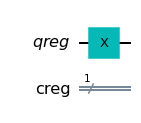

In [31]:
# we can draw the same circuit by using matplotlib
qc.draw(output='mpl')

#### Let''s visualize the obtained state on the Q-Sphere using the methods: 1. Statevector.from_instruction that returns the output state of a quantum circuit.
#### 2. plot_state_qsphere: This method returns a plot of the representation of the state on the qsphere.

(This part can be done with circuits that do not include measurements).

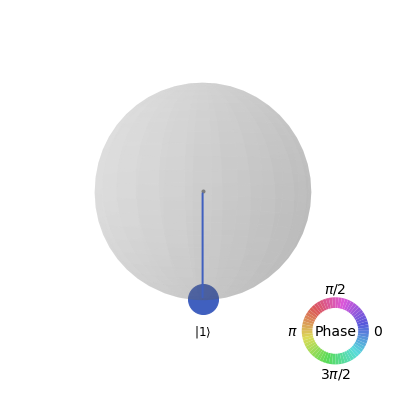

In [32]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

state= Statevector.from_instruction(qc)
plot_state_qsphere(state) 

### Let's add measurements

In [33]:
# measurement is defined by associating a quantum bit to a classical bit
qc.measure(q[0],c[0])
# after the measurement, the observed value of the quantum bit is stored in the classical bit

# we run our codes until now, and then draw our circuit
print("The design of the circuit is done.")

The design of the circuit is done.


Now together with the measurements part, the final quantum circuit will look like:

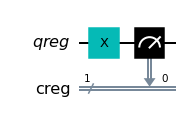

In [34]:
qc.draw(output='mpl')

<h3>Execute the circuit</h3>

A quantum program can be executed on a real quantum computer or a local classical simulator or a simulator in the cloud. Here we use a local classical simulator provided by Qiskit and so our results will be (almost) accurate. 
The state of the quantum bit is expected to be |1> after the operator. So, the value of the classical bit after the measurement is expected to be 1.

*Remark that the existing real quantum computers are still noisy. So when using the real Quantum computer the observed results will be inaccurate.*

To simulate the circuit classically, we will see here how we can run it on the 'qasm-simulator' and on the 'statevector simulator' that can be imported from the Qiskit Aer package (there is also the 'unitary simulator' that we're not considering here). 

The main difference between running the circuit on the 'qasm simulator' and on the 'statevector simulator' is that using the statevector simulator we compute the accurate final qubits quantum state without performing measurements (\finite number of measurements) at the end, and hence it does not take into account statistical noise. The 'qasm simulator' on the other hand, mimics an actual quantum computer as it performs a finite number of measurements at the end and therefore takes into account the statatistical noise accompanied with the readout of the results.  

### State Vector Simulator

In [35]:
from qiskit import Aer
from qiskit import execute
backend = Aer.get_backend('statevector_simulator')

result=execute(qc, backend).result()

In [36]:
print(result)

Result(backend_name='statevector_simulator', backend_version='0.12.0', qobj_id='', job_id='cfa8ac1f-7ba2-48e0-905e-623a453818aa', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1}, statevector=Statevector([0.+0.j, 1.+0.j],
            dims=(2,))), header=QobjExperimentHeader(creg_sizes=[['creg', 1]], global_phase=0.0, memory_slots=1, metadata=None, n_qubits=1, name='circuit-123', qreg_sizes=[['qreg', 1]]), status=DONE, seed_simulator=3487432209, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'parallel_state_update': 12, 'parallel_shots': 1, 'device': 'CPU', 'active_input_qubits': [0], 'measure_sampling': False, 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'num_qubits': 1, 'method': 'statevector', 'result_types': {'statevector': 'save_statevector'}, 'result_subtypes': {'statevector': 'single'}, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 14, 'enabled':

So, to extract the statevector from the data, we use the method: get_statevector(qc)

In [37]:
final_state=result.get_statevector(qc)
print('final_state:',final_state)


final_state: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


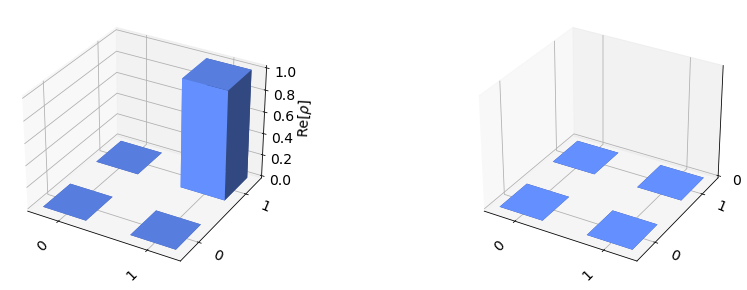

In [38]:
#To print the density matrix of the obtained result:
from qiskit.visualization import plot_state_city
plot_state_city(final_state)

final_state_counts: {'1': 1}


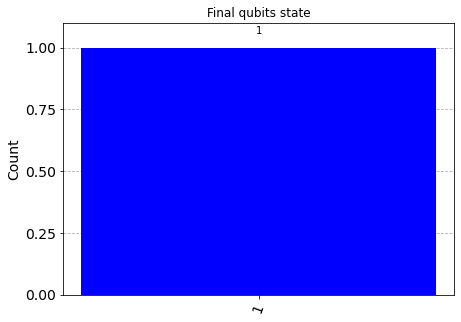

In [39]:
#or we can plot a histogram, and this is easily done using the method: result.get_counts(qc)
from qiskit.visualization import plot_histogram
final_state_counts=result.get_counts(qc)
#final_state_counts includes dictionary: {'qubits_state0':number_of_counts_of-state0,'qubits_state1':probability to measure qubits_state1,...etc'}
print('final_state_counts:',final_state_counts)
plot_histogram(final_state_counts,color='blue', title="Final qubits state")

Which is exactly what we expect to have, the qubits is in state 0!

### Qasm_simulator

In [40]:
from qiskit import Aer
from qiskit import execute
backend = Aer.get_backend('qasm_simulator')

In [41]:
resultqasm = execute(qc, backend, shots=1024).result()

final_state_counts: {'1': 1024}


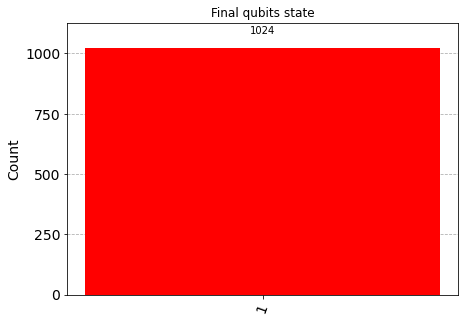

In [42]:
from qiskit.visualization import plot_histogram
final_state_counts=resultqasm.get_counts(qc)

print('final_state_counts:',final_state_counts)
plot_histogram(final_state_counts,color='red', title="Final qubits state")

### Real Device Simulator

To run the circuit on a real IBM quantum device, we need to first load our IBM_account. If we are working here, there is no need to copy it, we can just type

Install the IBM Quantum Provider package by running the following command in your terminal or command prompt:

In [43]:
pip install qiskit-ibmq-provider

Note: you may need to restart the kernel to use updated packages.


Once you have installed the package, you can use the IBMQ.save_account() method to save your credentials. You need to provide your IBM Quantum Experience API token when prompted. Run the following code snippet:

In [46]:
from qiskit import IBMQ
IBMQ.save_account('YOUR API TOKEN')


Replace 'YOUR_API_TOKEN' with the API token you obtained from the IBM Quantum Experience website.

After saving your account credentials, you can load them using IBMQ.load_account(). Run the following code snippet

This will load your account credentials and provide you access to the IBM Quantum devices.


In [47]:
provider = IBMQ.load_account()

However, if you are working on some other platform you'll need to specify your API token. You can find your API token here: https://quantum-computing.ibm.com/account. 

In [48]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [50]:
from qiskit import IBMQ
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_lima')

In [51]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))

ibmqfactory.load_account:WARNING:2023-07-05 00:52:04,020: Credentials are already in use. The existing account in the session will be replaced.


This list can is shown also in the Dashboard tab as well on the right side:
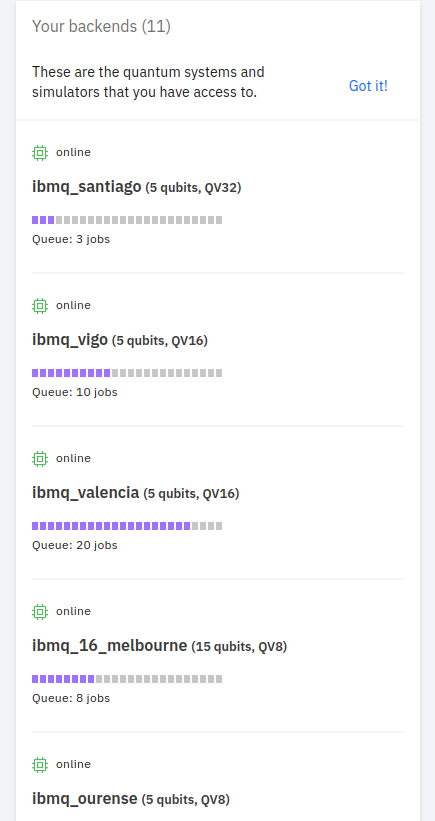

Now similar to the qasm simulator we do the following to run our circuit and obtaining the final state: 

In [ ]:
from qiskit.tools.monitor import job_monitor
job=execute(qc, backend, shots=1024)
job_monitor(job)
final_state_counts = job.result().get_counts(qc1)


Job Status: job is queued (None)

In [ ]:
print('final_state_counts:',final_state_counts)
plot_histogram(final_state_counts,color='blue', title="Final qubits state")